In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
from numpy import argmax
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [2]:
xlsx = pd.ExcelFile('data/ag_ci_mar_jun.xlsx')
#fields = ['Short description', 'Assignment group']

data_sheets = []
for sheet in xlsx.sheet_names:
    data_sheets.append(pd.read_excel(xlsx,sheet, usecols=[0,1,2]))
df = pd.concat(data_sheets)

print("Input Dataframe Shape(rows,cols):",df.shape)



Input Dataframe Shape(rows,cols): (100000, 3)


In [5]:
#df = pd.read_csv('dump_cat_ag.csv')

In [2]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

In [3]:
df.columns = [c.replace(' ', '_') for c in df.columns]
print(df.shape)
df= df.drop_duplicates()
print(df.shape)

(100000, 3)
(77389, 3)


In [4]:
df.head()

,Configuration_item,Short_description,Assignment_group
0,ECISA Cerner Millennium Powerchart,FW: microviewer not displaying antibiotics pro...,DH-ClinApps Pharmacy
1,Network Account Lock,network---customer wanted his acc to be unlock...,DH-Enterprise IT Service Cntr
2,Course - Completion Issue,FW: HR Case HRC0041119 has been closed,DHE-HR Tier 2 - Talent Management
3,Network Account Lock,Network account- locked || user id- djames003,DH-Enterprise IT Service Cntr
4,Mobile Cart,WOW / Workstation on Wheels || WOW / Workstati...,DH-NC-EUS Sac MGH


In [7]:
print(df.shape)
df1=df.drop(['Category'], axis=1)
#df.drop_duplicates()
print(df.shape)

(106371, 3)
(106371, 3)


In [25]:


#print(df.Configuration_item.nunique)
df3=df2.groupby("Configuration_item").filter(lambda x: len(x) > 100)
#print(df1.shape)
#df2=df.groupby("Assignment_group").filter(lambda x: len(x) > 100)
print(df3.shape)
#df2.dropna()
#print(df2.shape)

(63587, 3)


In [93]:
df5=df3.groupby("Configuration_item").filter(lambda x: len(x) > 300)
print(df5.Configuration_item.nunique())

45


In [33]:
#get data with at leaset count(assignment group)>200
#df1 = df.drop_duplicates()
#df2=df1.groupby("Assignment_group").filter(lambda x: len(x) > 300)
#(140690, 2)  , 78 outputs
#df2=df1.groupby("Assignment_group").filter(lambda x: len(x) > 500)
#(128992, 2), 49 
#df1=df.groupby("Assignment_group").filter(lambda x: len(x) > 100)
#(115650, 2) 28
print(df2.Configuration_item.nunique(),df3.Configuration_item.nunique())
print(df1.Assignment_group.nunique(),df3.Assignment_group.nunique())
#print(df2.groupby("Assignment_group").filter(lambda x: len(x) > 100 )

1442 94
186 93


In [10]:
#get data with at leaset count(assignment group)>200
#df1 = df.drop_duplicates()
df3_2 = df2[df2.Assignment_group == 'DH-Enterprise IT Service Cntr']
df3_1 = df2[df2.Assignment_group != 'DH-Enterprise IT Service Cntr']
df3_0 = df3_2.sample(frac=0.4)
print(df3_0.shape)
df4= pd.concat([df3_0,df3_1])
df4 =df4.sample(frac=1).reset_index(drop=True)
print(df4.shape)
#print(df2.shape,df2.Assignment_group.nunique())

(17622, 2)
(61451, 2)


In [13]:
dfx = df.groupby("Assignment_group").filter(lambda x: len(x) > 400).sample(frac=0.005)
dfx.to_csv('sample_cat_ag.csv')

In [15]:
a=df.Assignment_group.value_counts()
dfxz = pd.DataFrame(index=np.arange(0, 106371),columns=['X'])
dfxz =a

dfxz.to_csv('ag_groups_list.csv')

In [31]:
#dfx['newcol'] = dfx.Assignment_group
df4['newcol'] = df4.apply(lambda row: 'EUS Group' if str(row).find('EUS')>0 else row, axis=1)

In [10]:
#df4=df4.drop(['newcol'],axis=1)
df.head()

,Configuration_item,Short_description,Assignment_group
0,ECISA Cerner Millennium Powerchart,FW: microviewer not displaying antibiotics pro...,DH-ClinApps Pharmacy
1,Network Account Lock,network---customer wanted his acc to be unlock...,DH-Enterprise IT Service Cntr
2,Course - Completion Issue,FW: HR Case HRC0041119 has been closed,DHE-HR Tier 2 - Talent Management
3,Network Account Lock,Network account- locked || user id- djames003,DH-Enterprise IT Service Cntr
4,Mobile Cart,WOW / Workstation on Wheels || WOW / Workstati...,DH-NC-EUS Sac MGH


In [90]:
#print(df4.shape)
#df4.Assignment_group = df4.newcol
#df4=df4.drop(['Assignment_group'], axis=1)
#df4.drop_duplicates()
#print(df4.shape)
#print(df4.newcol.nunique())
#df4.newcol.value_counts()
df3.Configuration_item.value_counts()

Desktop                                                    9779
Network Account Issue                                      7331
Network Account Lock                                       5755
First Call Resolution CI                                   2837
Printer                                                    1927
FCR - Application ID/Password                              1660
Encryption - Desktop/Laptop                                1636
Outlook                                                    1549
Laptop                                                     1228
FCR - End User Resolved                                    1211
Missing Icon                                               1135
Phone                                                      1063
Kyocera - H/W                                               992
FLR- Software Installs/Upgrade                              965
Gather Information                                          958
FCR - Customer Call Back                

In [47]:
print(df4.Assignment_group.nunique())
df5=df4.groupby("Assignment_group").filter(lambda x: len(x) > 1000)
print(df5.shape)
print(df5.Assignment_group.nunique())


(43348, 2)


12

In [94]:
#Create input and output data sets
X = df5.Short_description
Y = df5.Configuration_item
#Y_AG = df.Assignment_group
print(X.shape,Y.shape)

(55029,) (55029,)


In [75]:
Y_AG = df3.Assignment_group

In [95]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop = stopwords.words('english')
lemmer=WordNetLemmatizer()
#remove special chars
#pat = r'[_]+'
#X = X.str.replace(pat, '',regex=True)
pat = r'[^A-Za-z ]+'
X = X.str.replace(pat, ' ',regex=True)
X = X.apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))
X = X.apply(lambda x: ' '.join([lemmer.lemmatize(word) for word in str(x).split()]))

#X = X.apply(lambda x: ' '.join([word for word in str(x).split() if word.isalpha() ]))

In [18]:
print(sum([len(str(s).split()) for s in X]))
#1131417
# 951883

752711


In [96]:
#Encode outputs into N- dim one hot encoded matrix
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Y)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#print(onehot_encoded)
# invert first example to return original, must for return api --how to inverse transform post deploy
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

In [97]:
print(onehot_encoded.shape)

(55029, 45)


In [17]:
#df_col_len = int(X.len().max())
#print(df_col_len)


In [25]:
X1 = X1.astype(str)
#print df['strange'].apply(lambda x: len(x))

In [98]:
#Split into train and test(15%)
X_train,X_test,Y_train,Y_test = train_test_split(X,onehot_encoded,test_size=0.15)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
#(119586,) (21104,) (119586, 78) (21104, 78)

(46774,) (8255,) (46774, 45) (8255, 45)


In [78]:
#Split into train and test(15%)
X_train,X_test,X1_train,X1_test,Y_train,Y_test = train_test_split(X,Y_AG,onehot_encoded,test_size=0.15)
print(X_train.shape,X1_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
#(119586,) (21104,) (119586, 78) (21104, 78)

(54048,) (54048,) (9539,) (54048, 94) (9539, 94)


In [101]:
# Tokenize and pad , init max sizes...should find way to eff value max words 
max_words = 25000
max_len = 30 #df_col_len #35
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
print(sequences_matrix.shape)

(46774, 30)


In [82]:
# Tokenize and pad , init max sizes...should find way to eff value max words 
max_words2 = 200
max_len2 = 5 #df_col_len #35
tok2 = Tokenizer(num_words=max_words)
tok2.fit_on_texts(Y_AG)
sequences2 = tok2.texts_to_sequences(X1_train)
sequences_matrix2 = sequence.pad_sequences(sequences2,maxlen=max_len2)
print(sequences_matrix2.shape)

(54048, 5)


In [100]:
# calculate vocabulary size
vocab_size = len(tok.word_index) + 1
print(vocab_size)

28487


In [63]:
Y.nunique()

94

In [87]:
num_classes=Y.nunique()
from keras.models import Sequential
from keras.layers import Merge, Activation, Dense
from keras.layers.recurrent import LSTM

model1 = Sequential()
model1.add(Embedding(max_words, 50, input_length=max_len))
model1.add(Dropout(0.2))
model1.add(LSTM(64))
model1.add(Dropout(0.2))

model2 = Sequential()
model2.add(Embedding(max_words2, 20, input_length=max_len2))
model2.add(Dropout(0.2))
model2.add(LSTM(16))
model2.add(Dropout(0.2))

model3 = Sequential()
model3.add(Merge([model1, model2], mode='concat'))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))
model3.compile(optimizer='RMSprop', loss='categorical_crossentropy',metrics=['accuracy'])
#model.fit([X[:,:m,:], X[:,m:,:]], y)


C:\Users\124578\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:19: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [88]:
history = model3.fit([sequences_matrix,sequences_matrix2],Y_train,batch_size=64,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.1)])

Train on 43238 samples, validate on 10810 samples
Epoch 1/10
43238/43238 [==============================] - 72s 2ms/step - loss: 3.3490 - acc: 0.2304 - val_loss: 3.1265 - val_acc: 0.2592
Epoch 2/10
43238/43238 [==============================] - 63s 1ms/step - loss: 3.0683 - acc: 0.2769 - val_loss: 2.9898 - val_acc: 0.2844
Epoch 3/10
43238/43238 [==============================] - 65s 2ms/step - loss: 2.9803 - acc: 0.2916 - val_loss: 2.9486 - val_acc: 0.2904


In [102]:
num_classes=Y.nunique()
#define LSTM  model
#tweak parameters/layers to inc. eff, smtimes 1D conv also used
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs) #50 dim
    layer = LSTM(64,name='RNN_LSTM')(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu',name='Act_ReLU')(layer)
    layer = Dropout(0.4,name='Dropout')(layer)
    layer = Dense(num_classes,name='Out_layer')(layer)  #num_classes=# of outputs
    layer = Activation('softmax',name='Act_Softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [103]:
#compile model with optimizer -  can use RMSProp or Adam
model = RNN()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 30)                0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 30, 50)            1250000   
_________________________________________________________________
RNN_LSTM (LSTM)              (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
Act_ReLU (Activation)        (None, 256)               0         
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
Out_layer (Dense)            (None, 45)                11565     
__________

In [104]:
#execute the model, early stopping if model stops converging, batch size can be tweaked. 20% data for validation each epoch
history = model.fit(sequences_matrix,Y_train,batch_size=64,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.1)])
#Epoch 6/10
#95668/95668 [==============================] - 141s 1ms/step - loss: 1.2015 - acc: 0.7190 - val_loss: 1.3778 - val_acc: 0.7008

Train on 37419 samples, validate on 9355 samples
Epoch 1/10
37419/37419 [==============================] - 54s 1ms/step - loss: 2.4147 - acc: 0.3612 - val_loss: 1.9711 - val_acc: 0.4540
Epoch 2/10
37419/37419 [==============================] - 57s 2ms/step - loss: 1.7675 - acc: 0.5065 - val_loss: 1.6324 - val_acc: 0.5489
Epoch 3/10
37419/37419 [==============================] - 55s 1ms/step - loss: 1.4808 - acc: 0.5818 - val_loss: 1.4363 - val_acc: 0.5974
Epoch 4/10
37419/37419 [==============================] - 52s 1ms/step - loss: 1.3054 - acc: 0.6307 - val_loss: 1.3411 - val_acc: 0.6304


In [64]:
from keras import backend as K
#K.clear_session()

In [105]:
#Create sequences for test data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [106]:
#Calculate accuracy on test data
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3%}'.format(accr[0],accr[1]))

8255/8255 [==============================] - 6s 682us/step
Test set
  Loss: 1.314
  Accuracy: 63.840%


In [53]:
print(df3.shape)
df4=df3.sample(frac=0.002)
print(df4.shape)
df4.to_csv('ci_ag_sample.csv')

(63587, 3)
(127, 3)


In [54]:
#load unseen data for validation
df_val = pd.read_csv('ci_ag_sample.csv')
Xnew=df_val.Short_description.astype(str)
Ynew_orig = df_val.Configuration_item
Ynew_orig2 = df_val.Assignment_group
#Assignment_group
print(Xnew.shape,Ynew_orig.shape)

(127,) (127,)


In [57]:
Ynew_orig2 = df_val.Assignment_group

In [55]:
#convert unseen data to word tokens
Xnew_2 = sequence.pad_sequences(tok.texts_to_sequences(Xnew),maxlen=max_len)

In [56]:
#predict output on unseen data
ynew = model.predict(Xnew_2)

In [58]:
dfzz = pd.DataFrame(index=np.arange(0, len(Xnew)),columns=['X', 'Pred', 'Orig','Prob','Asg_Grp'])
for i in range(len(Xnew)):
    dfzz.iloc[i]  = [Xnew[i], label_encoder.inverse_transform([argmax(ynew[i, :])]),Ynew_orig[i],np.max(ynew[i, :]),Ynew_orig2[i]]
dfzz.to_csv('ci_ag_sample_pred.csv')
print(dfzz.shape)

(127, 5)


In [74]:
#Print unseen data, predicted value, original value
for i in range(50):
    print("\nX=%s,\nPredicted=%s,\nOriginal=%s" % (Xnew[i], label_encoder.inverse_transform([argmax(ynew[i, :])]),Ynew_orig[i]))
    print(np.max(ynew[i, :]))
    #print("")
    #print(ynew[i, :])


X=Kimberly Hepler Powerchart Opening Multiple Charts,
Predicted=['DH-ClinApps NAS'],
Original=DH-ClinApps Core
0.503406

X=Volume Space Nearly Full warning event san Volume Space Nearly Full,
Predicted=['DH-Storage Services'],
Original=DH-Storage Services
0.999743

X=Allscripts Unable login User ID jphanthaphonsy HDUV done Reset password Able login Issue resolved,
Predicted=['DH-Enterprise IT Service Cntr'],
Original=DH-Enterprise IT Service Cntr
0.999185

X=Network account Issue Unable log User locked User ID,
Predicted=['DH-Enterprise IT Service Cntr'],
Original=DH-Enterprise IT Service Cntr
0.980345

X=Desktop II application slow II IP,
Predicted=['DH-Enterprise IT Service Cntr'],
Original=DH-Enterprise IT Service Cntr
0.441777

X=The monitor shoows signal error,
Predicted=['DH-SW-EUS StJoseph'],
Original=DH-NC-EUS Red Bluff
0.282447

X=Lawson login issue guided login employee number network password,
Predicted=['DH-Enterprise IT Service Cntr'],
Original=DH-Enterprise IT Service Cn

In [107]:
import pickle
with open('../model/2/tokenizer_ci.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../model/2/le_ci.pickle', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)
model_json = model.to_json()
with open("../model/2/model_ci.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("../model/2/model_ci.h5")
print("Saved model to disk")

Saved model to disk


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


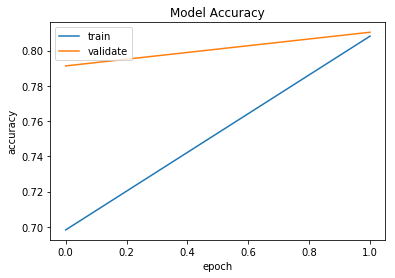

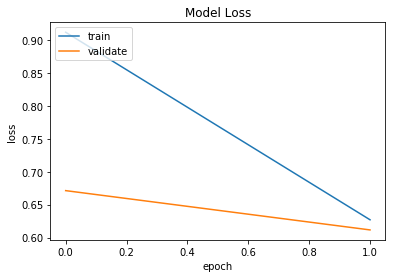

In [55]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [42]:
# Import what's needed for the Functions API
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.metrics import roc_curve, auc
from textwrap import wrap
#from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

In [43]:
#labels = [ '\n'.join(wrap(l, 20)) for l in labels ]
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    names = [ '\n'.join(wrap(l, 20)) for l in names ]
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [66]:
pred = model.predict(test_sequences_matrix)
pred = np.argmax(pred,axis=1)
y_test2 = np.argmax(Y_test,axis=1)

print(pred.shape,Y_test.shape,y_test2.shape)

(6503,) (6503, 12) (6503,)


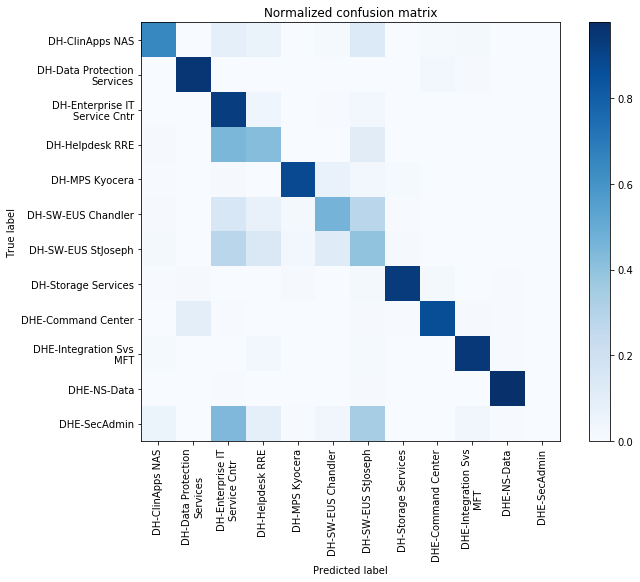

In [67]:
#confusion matrix
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

labels= label_encoder.classes_
    
# Compute confusion matrix
cm = confusion_matrix(y_test2, pred)
np.set_printoptions(precision=2)
#print('Confusion matrix, without normalization')
#print(cm)
#plt.figure()
#plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#print('Normalized confusion matrix')
#print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title='Normalized confusion matrix')
plt.savefig('cm_ag_2.png', dpi=100)
plt.show()

Text(0.5,1,'Data distribution')

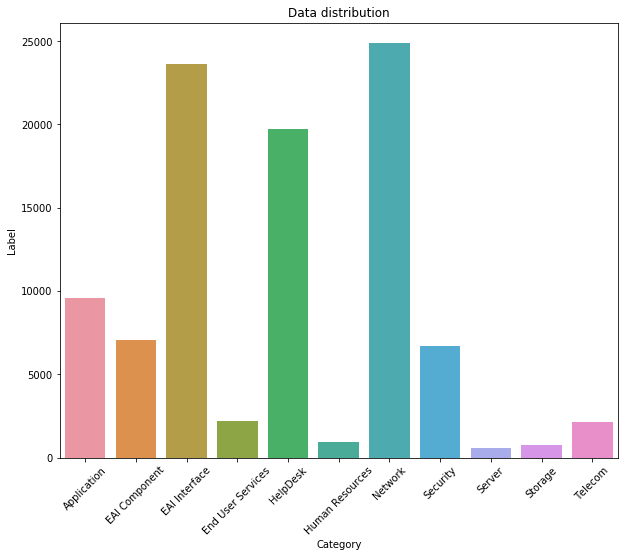

In [67]:
sns.countplot(Y)
names1 = [ '\n'.join(wrap(l, 20)) for l in labels ]
tick_marks = np.arange(len(names1))
plt.xticks(tick_marks, names1, rotation=45)
plt.ylabel('Label')
plt.title('Data distribution')

In [79]:
from sklearn import metrics
print(metrics.classification_report(y_test2, pred, 
                                    target_names=df5.Assignment_group.unique()))

                               precision    recall  f1-score   support

DH-Enterprise IT Service Cntr       0.84      0.65      0.73       262
           DHE-Command Center       0.78      0.95      0.86       289
                  DHE-NS-Data       0.88      0.92      0.90      2654
      DHE-Integration Svs MFT       0.38      0.42      0.40       291
          DH-Storage Services       0.89      0.88      0.88       205
              DH-ClinApps NAS       0.55      0.46      0.51       185
           DH-SW-EUS Chandler       0.29      0.40      0.33       270
  DH-Data Protection Services       0.94      0.93      0.93       191
               DH-MPS Kyocera       0.97      0.87      0.92       762
           DH-SW-EUS StJoseph       0.89      0.94      0.92       236
              DH-Helpdesk RRE       0.99      0.98      0.98      1008
                 DHE-SecAdmin       0.00      0.00      0.00       150

                  avg / total       0.83      0.84      0.83      6503



C:\Users\124578\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
